In [115]:
# install pandas data rerader 
# !pip install pandas_datareader

In [147]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [117]:
# getting data of Google stock price 
start = dt.datetime(2002, 1, 1)

df_google = pdr.get_data_stooq('GOOGL', start)
df_google

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-20,95.10000,98.3000,95.02000,98.02000,63191078.0
2023-01-19,90.72000,93.6050,90.63000,93.05000,37000395.0
2023-01-18,92.14000,92.7999,90.64000,91.12000,29116691.0
2023-01-17,92.06000,92.2500,90.05000,91.29000,32602423.0
2023-01-13,90.85000,92.1900,90.12990,92.12000,26329212.0
...,...,...,...,...,...
2004-08-25,2.62400,2.7000,2.59700,2.65000,183956000.0
2004-08-24,2.78100,2.7900,2.58925,2.62175,305252000.0
2004-08-23,2.76875,2.8370,2.72625,2.73500,365488000.0


In [118]:
df_google.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-20,95.10,98.3000,95.0200,98.02,63191078.0
2023-01-19,90.72,93.6050,90.6300,93.05,37000395.0
2023-01-18,92.14,92.7999,90.6400,91.12,29116691.0
2023-01-17,92.06,92.2500,90.0500,91.29,32602423.0
2023-01-13,90.85,92.1900,90.1299,92.12,26329212.0


In [119]:
df_google.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-25,2.62400,2.7000,2.59700,2.65000,183956000.0
2004-08-24,2.78100,2.7900,2.58925,2.62175,305252000.0
2004-08-23,2.76875,2.8370,2.72625,2.73500,365488000.0
2004-08-20,2.52525,2.7270,2.51250,2.70775,457144000.0
2004-08-19,2.50000,2.6015,2.39900,2.50850,894076000.0


In [120]:
df_google.index

DatetimeIndex(['2023-01-20', '2023-01-19', '2023-01-18', '2023-01-17',
               '2023-01-13', '2023-01-12', '2023-01-11', '2023-01-10',
               '2023-01-09', '2023-01-06',
               ...
               '2004-09-01', '2004-08-31', '2004-08-30', '2004-08-27',
               '2004-08-26', '2004-08-25', '2004-08-24', '2004-08-23',
               '2004-08-20', '2004-08-19'],
              dtype='datetime64[ns]', name='Date', length=4638, freq=None)

In [121]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4638 entries, 2023-01-20 to 2004-08-19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4638 non-null   float64
 1   High    4638 non-null   float64
 2   Low     4638 non-null   float64
 3   Close   4638 non-null   float64
 4   Volume  4637 non-null   float64
dtypes: float64(5)
memory usage: 217.4 KB


In [122]:
data = df_google[['Close']]
data

,Close
Date,
2023-01-20,98.02000
2023-01-19,93.05000
2023-01-18,91.12000
2023-01-17,91.29000
2023-01-13,92.12000
...,...
2004-08-25,2.65000
2004-08-24,2.62175
2004-08-23,2.73500


# Visualisation

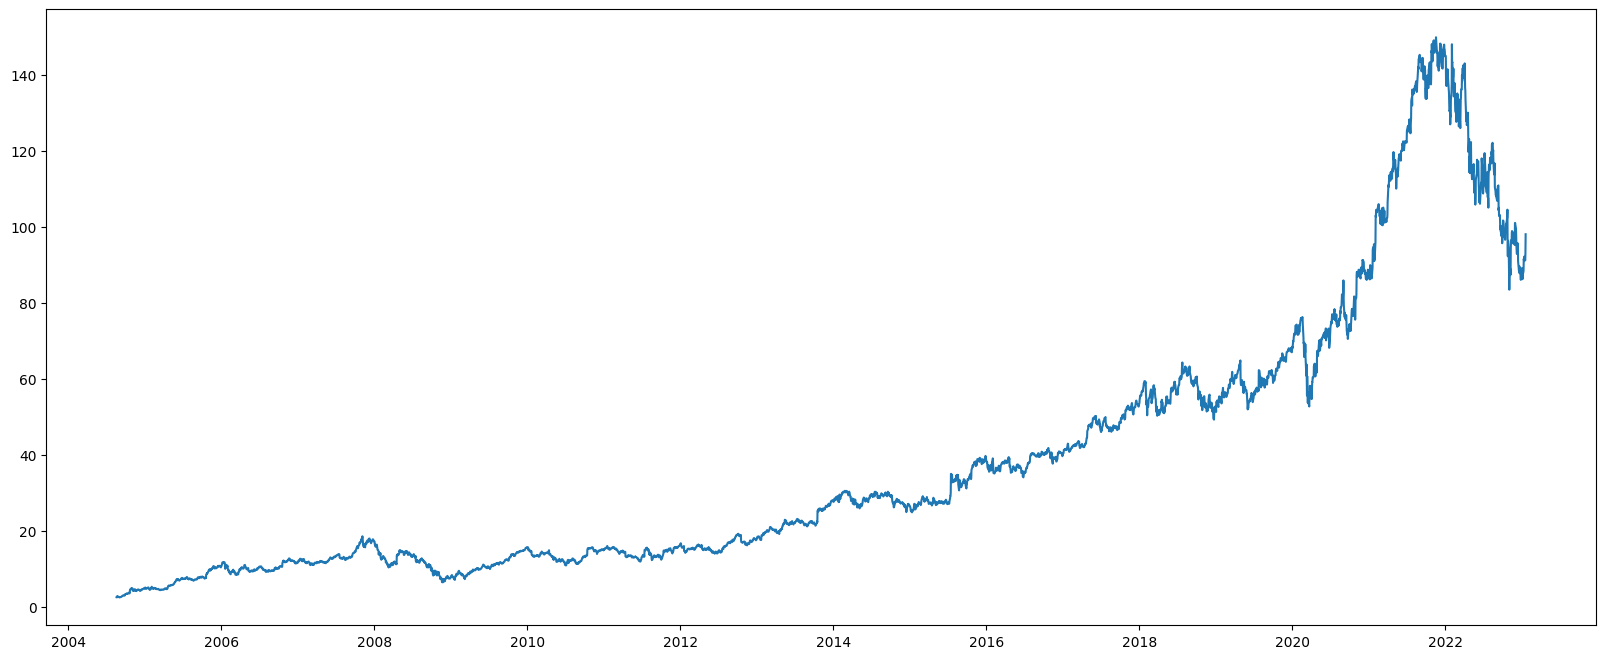

In [123]:
plt.figure(figsize = (20,8))
plt.plot(df_google['Close'])

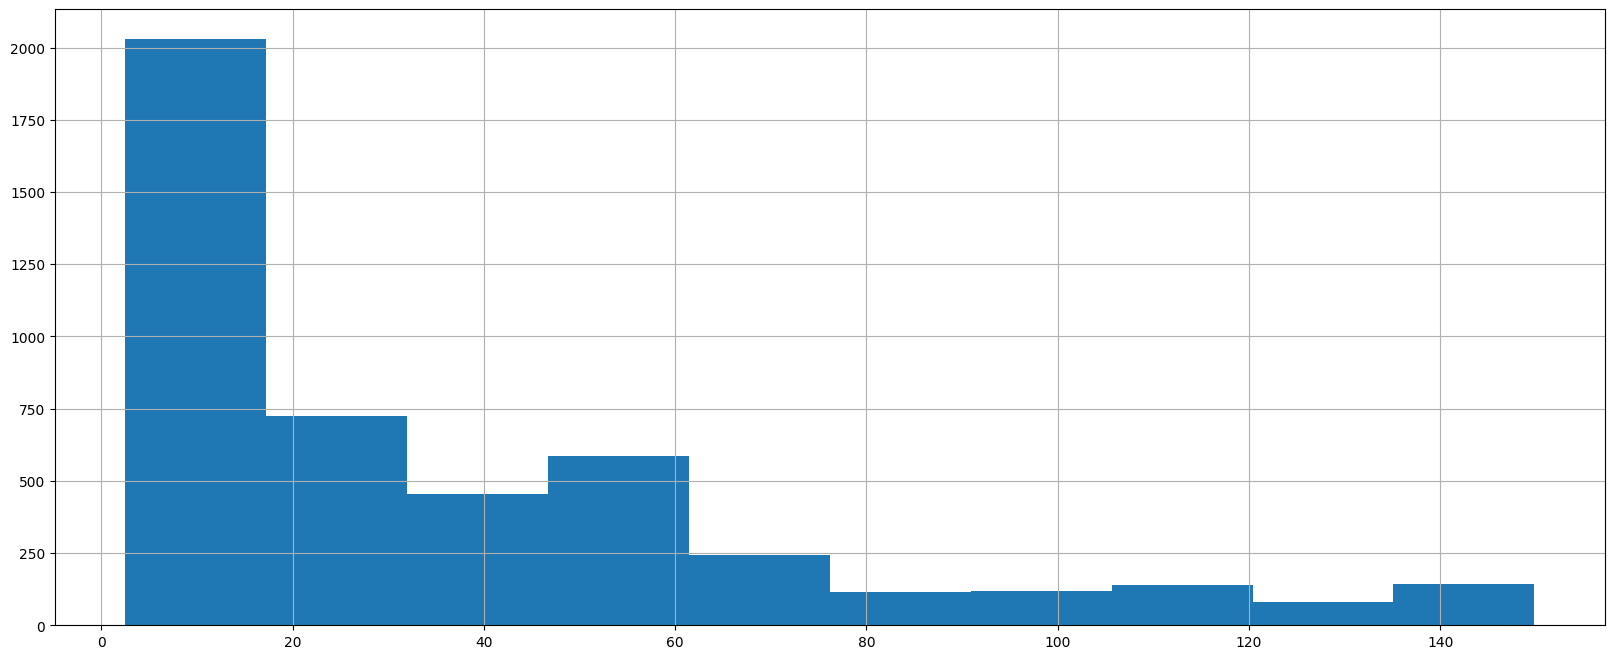

In [124]:
df_google['Close'].hist()
plt.show()

In [125]:
# create a boxplot of yearly data
databoxplot = df_google
databoxplot['Date'] = databoxplot.index.astype(str)
new = databoxplot['Date'].str.split('-',expand=True)

databoxplot = databoxplot[['Date','Close']]
databoxplot['year'] = new[0]
databoxplot['month'] = new[1]
databoxplot['date1'] = databoxplot['Date'].str[5:]
databoxplot

,Date,Close,year,month,date1
Date,,,,,
2023-01-20,2023-01-20,98.02000,2023,01,01-20
2023-01-19,2023-01-19,93.05000,2023,01,01-19
2023-01-18,2023-01-18,91.12000,2023,01,01-18
2023-01-17,2023-01-17,91.29000,2023,01,01-17
2023-01-13,2023-01-13,92.12000,2023,01,01-13
...,...,...,...,...,...
2004-08-25,2004-08-25,2.65000,2004,08,08-25
2004-08-24,2004-08-24,2.62175,2004,08,08-24
2004-08-23,2004-08-23,2.73500,2004,08,08-23


In [126]:
years = pd.pivot_table(databoxplot,index = 'date1', values = 'Close', columns='year', aggfunc = sum)

years

year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
date1,,,,,,,,,,,,,,,,,,,,
01-02,NaN,NaN,NaN,NaN,17.1300,8.0330,NaN,NaN,NaN,18.0810,27.8280,26.4775,NaN,NaN,53.6720,52.7340,68.4340,NaN,NaN,NaN
01-03,NaN,5.06800,10.8810,11.6900,17.1330,NaN,NaN,15.1090,16.6350,18.0920,27.6250,NaN,NaN,40.4005,54.5760,51.2735,68.0760,NaN,144.992,89.12
01-04,NaN,4.86250,11.1310,12.0815,16.4250,NaN,15.6690,15.0530,16.7070,18.4490,NaN,NaN,37.9720,40.3885,54.8000,53.9035,NaN,86.3065,144.400,88.08
01-05,NaN,4.83775,11.2810,12.1800,NaN,8.2010,15.6000,15.2270,16.4750,NaN,NaN,25.9730,38.0765,40.6510,55.5145,NaN,NaN,87.0025,137.775,86.20
01-06,NaN,4.71375,11.6415,NaN,NaN,8.3515,15.2065,15.3375,16.2505,NaN,27.9330,25.3320,37.9665,41.2605,NaN,NaN,69.8905,86.1440,137.748,87.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12-27,4.79775,10.61600,11.7010,17.5185,NaN,NaN,15.0595,16.0060,17.6570,27.9600,NaN,NaN,40.4965,53.0100,52.6450,67.7320,NaN,147.9060,87.390,NaN
12-28,4.81900,10.66700,11.5640,17.5630,NaN,15.5720,14.9730,15.9925,17.5000,NaN,NaN,39.1120,40.2285,52.7975,52.3340,NaN,88.6980,146.6870,86.020,NaN
12-29,4.82250,10.50400,11.5120,NaN,7.4355,15.4850,15.0250,16.0600,NaN,NaN,26.8655,39.6980,40.1415,52.6700,NaN,NaN,87.8880,146.6550,88.450,NaN


<AxesSubplot: >

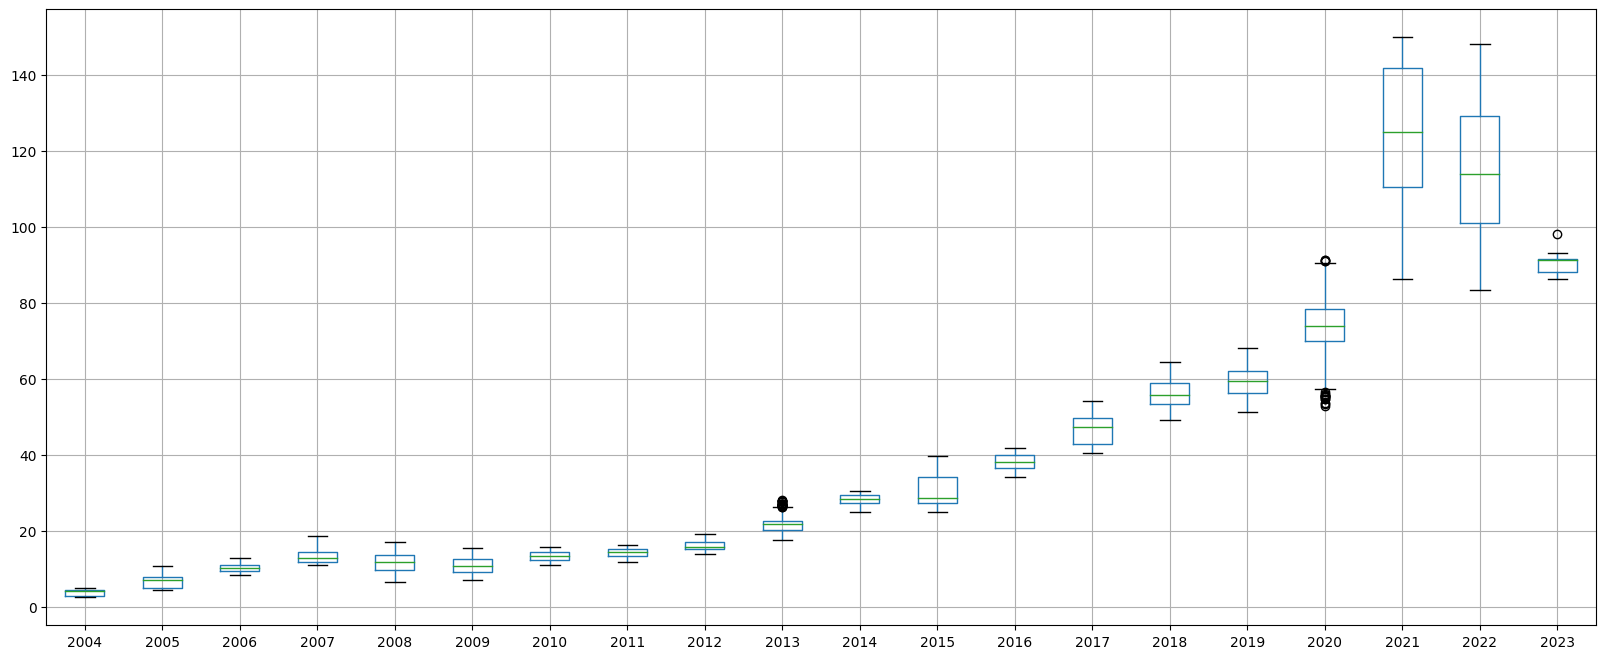

In [127]:
plt.figure(figsize=(20,8))

years.boxplot()

In [128]:
months = pd.pivot_table(databoxplot,index = 'date1', values = 'Close', columns='month', aggfunc = sum)

months

month,01,02,03,04,05,06,07,08,09,10,11,12
date1,,,,,,,,,,,,
01-02,272.38950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01-03,570.67100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01-04,616.22850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01-05,554.99425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01-06,585.11575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,570.49525
12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,614.52750
12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,563.21200


<AxesSubplot: >

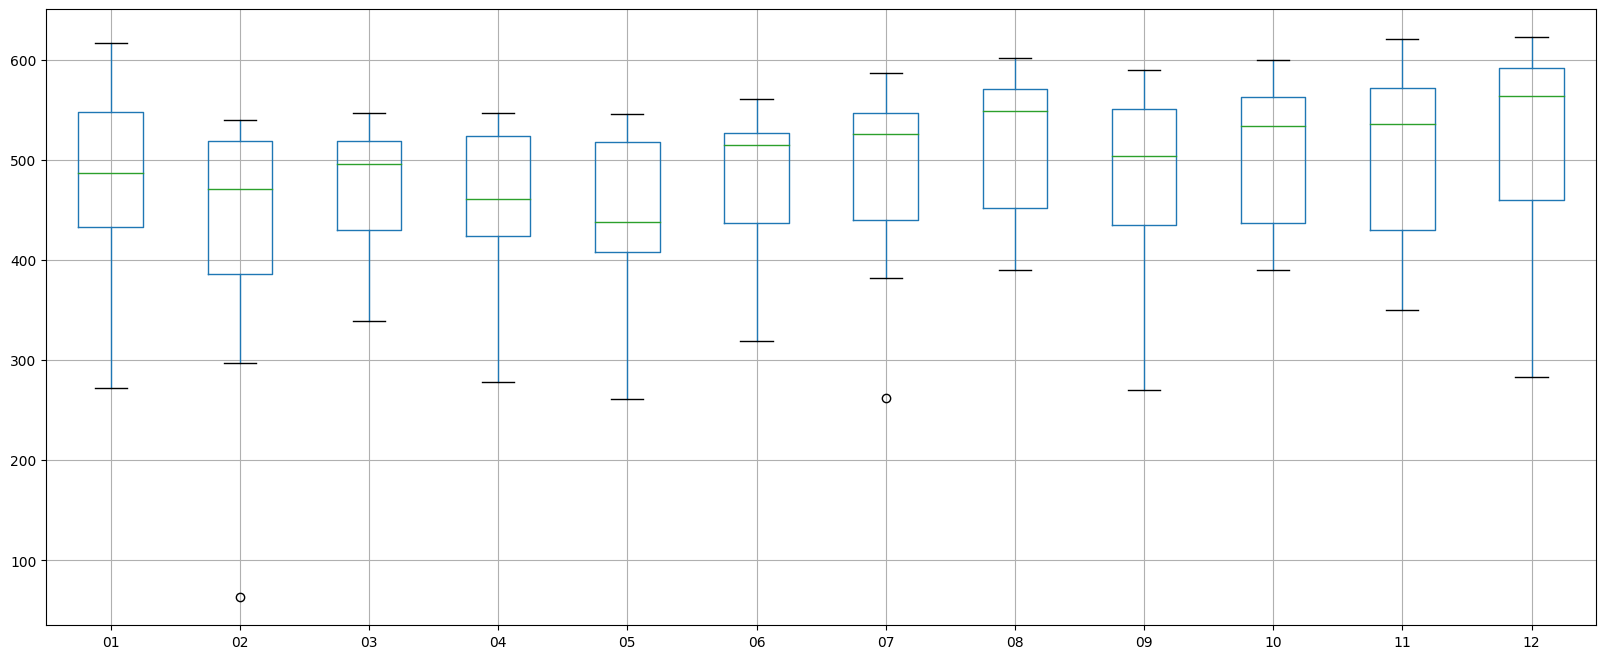

In [129]:
plt.figure(figsize=(20,8))

months.boxplot()

### Lag Plot

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 1)'>

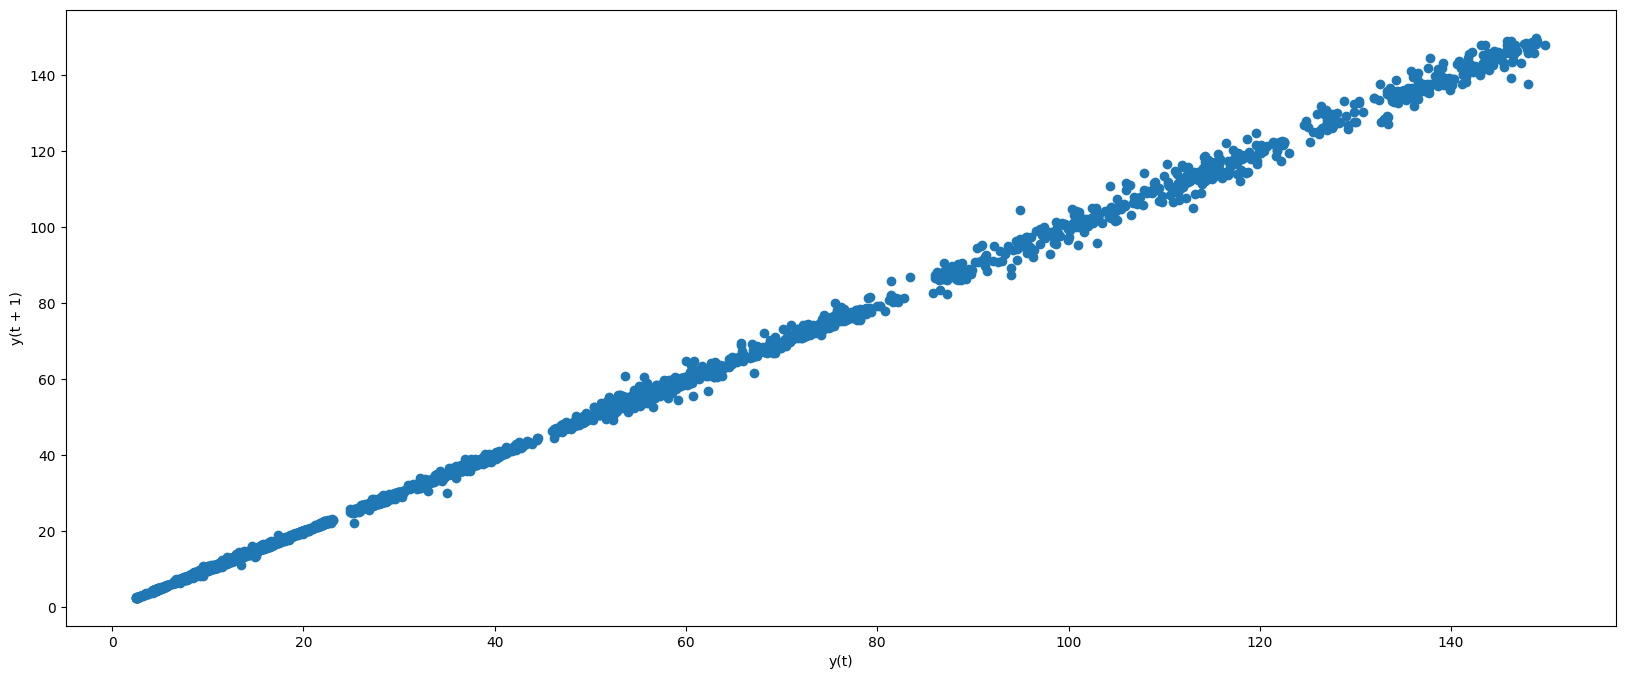

In [130]:
# scatter plot

from pandas.plotting import lag_plot
plt.figure(figsize = (20,8))
pd.plotting.lag_plot(data)

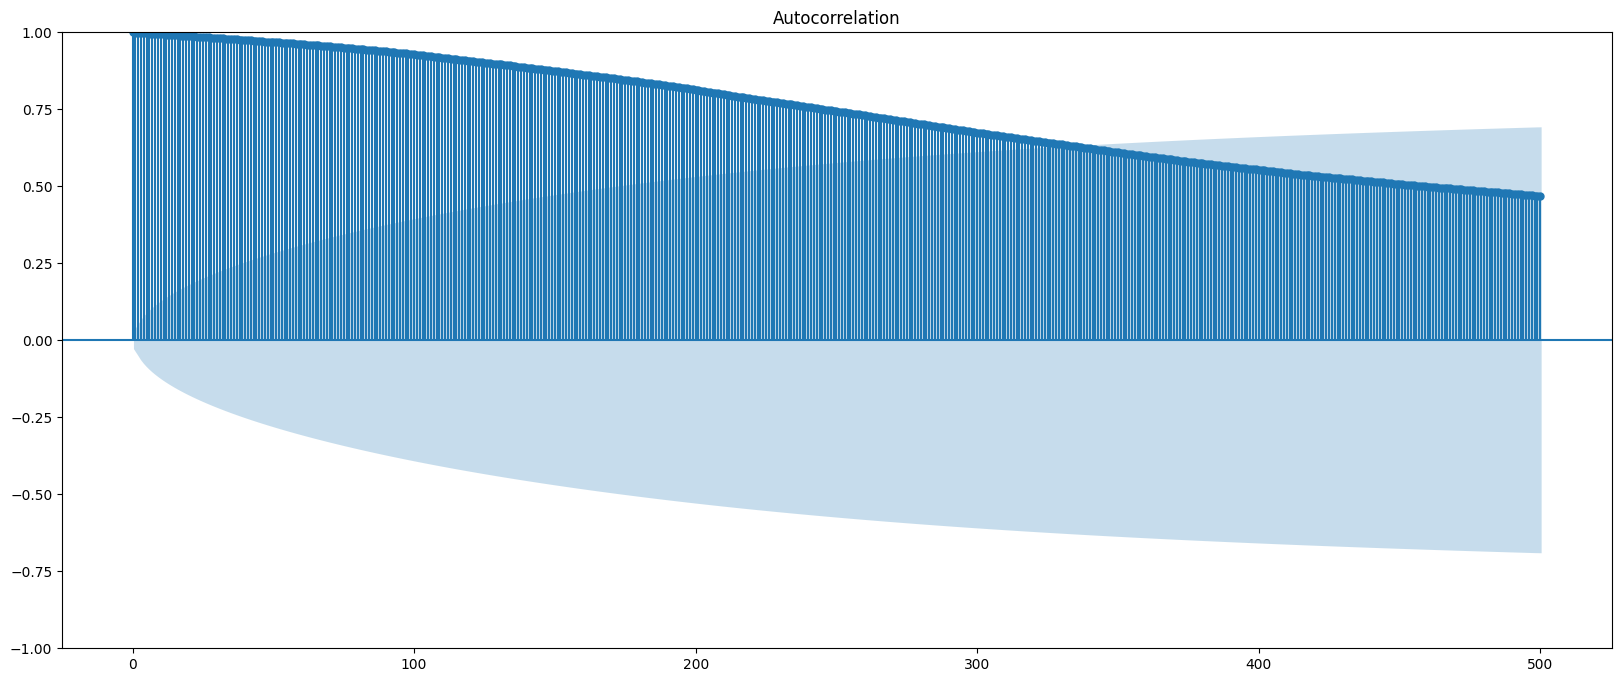

In [131]:
## AutoCorrelation Plot

from statsmodels.graphics.tsaplots import plot_acf

plt.rc("figure", figsize=(20,8))
plot_acf(data, lags=500)
plt.show()

## Sampling and Transformation

#### Upsampling 

In [132]:
# to create hourly data
upsampled = data.resample('H').mean()
print(upsampled.head(25))

                       Close
Date                        
2004-08-19 00:00:00  2.50850
2004-08-19 01:00:00      NaN
2004-08-19 02:00:00      NaN
2004-08-19 03:00:00      NaN
2004-08-19 04:00:00      NaN
2004-08-19 05:00:00      NaN
2004-08-19 06:00:00      NaN
2004-08-19 07:00:00      NaN
2004-08-19 08:00:00      NaN
2004-08-19 09:00:00      NaN
2004-08-19 10:00:00      NaN
2004-08-19 11:00:00      NaN
2004-08-19 12:00:00      NaN
2004-08-19 13:00:00      NaN
2004-08-19 14:00:00      NaN
2004-08-19 15:00:00      NaN
2004-08-19 16:00:00      NaN
2004-08-19 17:00:00      NaN
2004-08-19 18:00:00      NaN
2004-08-19 19:00:00      NaN
2004-08-19 20:00:00      NaN
2004-08-19 21:00:00      NaN
2004-08-19 22:00:00      NaN
2004-08-19 23:00:00      NaN
2004-08-20 00:00:00  2.70775


In [133]:
upsampled.shape

(161473, 1)

### Interpolate missing value

In [134]:
interpolated = upsampled.interpolate(method='linear')
interpolated.head(25)

,Close
Date,
2004-08-19 00:00:00,2.508500
2004-08-19 01:00:00,2.516802
2004-08-19 02:00:00,2.525104
2004-08-19 03:00:00,2.533406
2004-08-19 04:00:00,2.541708
2004-08-19 05:00:00,2.550010
2004-08-19 06:00:00,2.558312
2004-08-19 07:00:00,2.566615
2004-08-19 08:00:00,2.574917


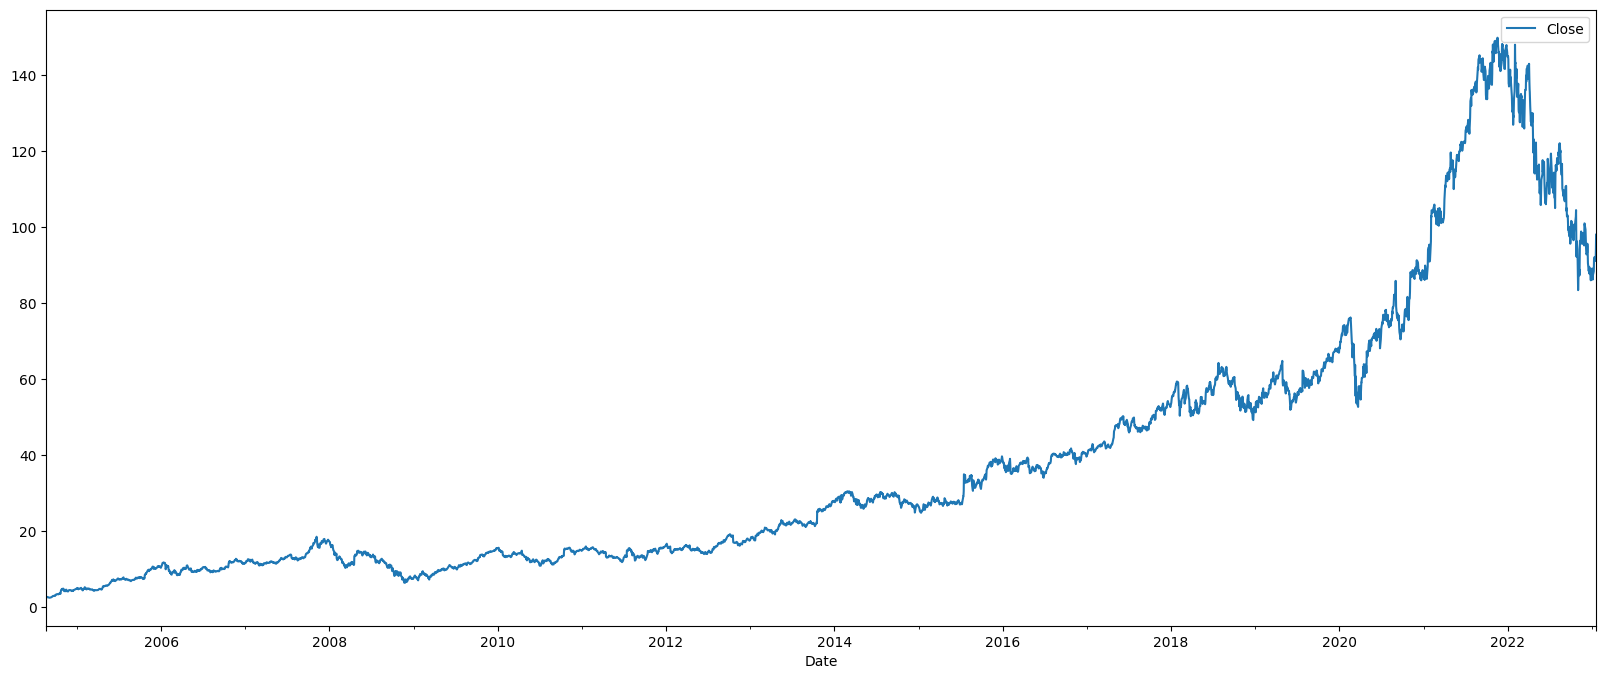

In [135]:
interpolated.plot()
plt.show()

#### Downsampling 

In [136]:
# downsample to quarterly intervals
resample = data.resample('Q')
downsampled = resample.mean()
downsampled.head()

,Close
Date,
2004-09-30,2.770942
2004-12-31,4.275074
2005-03-31,4.732648
2005-06-30,6.071621
2005-09-30,7.403297


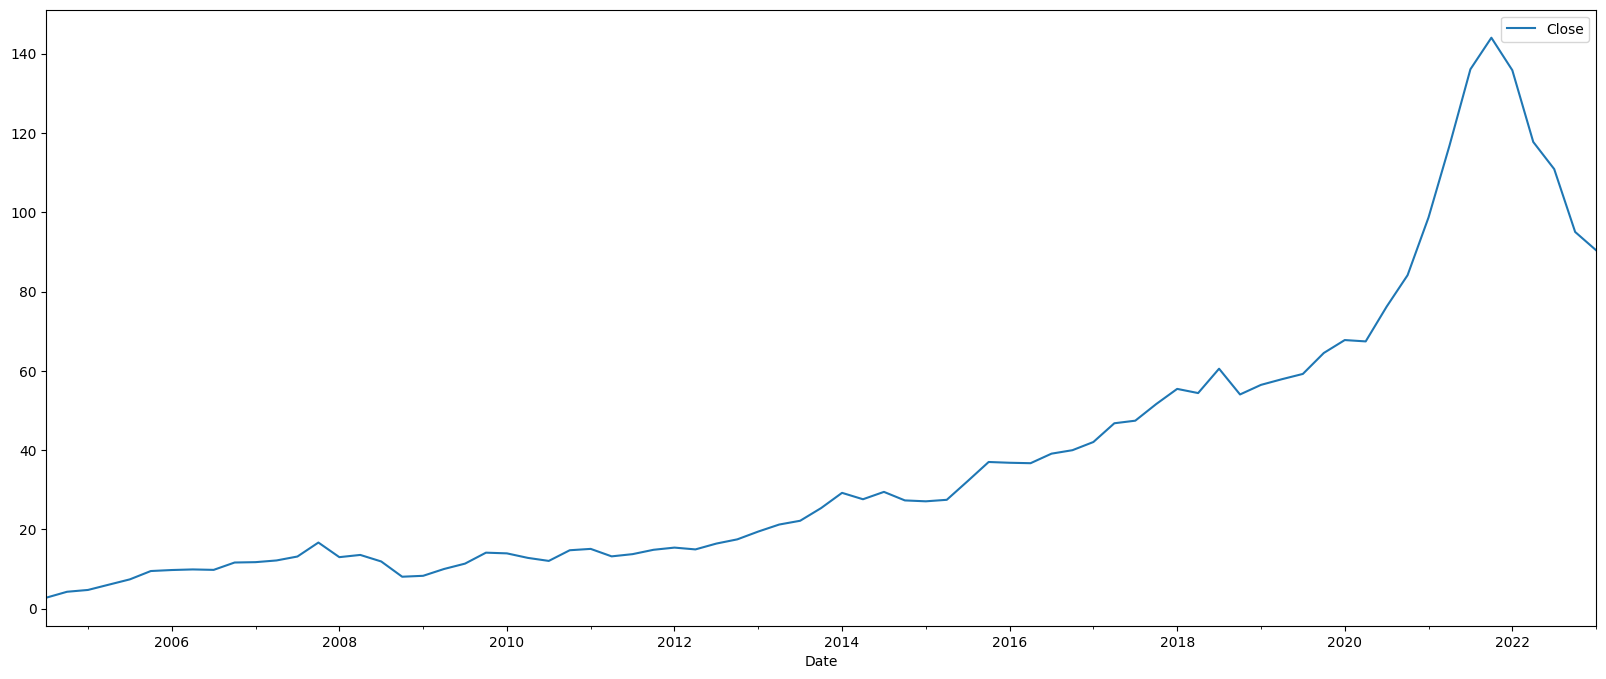

In [137]:
downsampled.plot()
plt.show()

### Transformation

#### Square Root Transform

In [138]:
dataframe = pd.DataFrame(np.sqrt(data.values), columns = ['close'])
dataframe

,close
0,9.900505
1,9.646243
2,9.545680
3,9.554580
4,9.597916
...,...
4633,1.627882
4634,1.619182
4635,1.653784
4636,1.645524


#### Log Transform

In [139]:
dataframe = pd.DataFrame(np.log(data.values), columns = ['close'])
dataframe

,close
0,4.585172
1,4.533137
2,4.512177
3,4.514041
4,4.523092
...,...
4633,0.974560
4634,0.963842
4635,1.006131
4636,0.996118


In [141]:
dataset = df_google[['Date','Close']]
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset

,Date,Close
Date,,
2023-01-20,2023-01-20,98.02000
2023-01-19,2023-01-19,93.05000
2023-01-18,2023-01-18,91.12000
2023-01-17,2023-01-17,91.29000
2023-01-13,2023-01-13,92.12000
...,...,...
2004-08-25,2004-08-25,2.65000
2004-08-24,2004-08-24,2.62175
2004-08-23,2004-08-23,2.73500


In [142]:
# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

dataset["month"] = dataset['Date'].dt.strftime("%b") # month extraction
dataset["year"] = dataset['Date'].dt.strftime("%Y") # year extraction
dataset["Day"] = dataset['Date'].dt.strftime("%d") # Day extraction
dataset["wkday"] = dataset['Date'].dt.strftime("%A") # weekday extraction

dataset

,Date,Close,month,year,Day,wkday
Date,,,,,,
2023-01-20,2023-01-20,98.02000,Jan,2023,20,Friday
2023-01-19,2023-01-19,93.05000,Jan,2023,19,Thursday
2023-01-18,2023-01-18,91.12000,Jan,2023,18,Wednesday
2023-01-17,2023-01-17,91.29000,Jan,2023,17,Tuesday
2023-01-13,2023-01-13,92.12000,Jan,2023,13,Friday
...,...,...,...,...,...,...
2004-08-25,2004-08-25,2.65000,Aug,2004,25,Wednesday
2004-08-24,2004-08-24,2.62175,Aug,2004,24,Tuesday
2004-08-23,2004-08-23,2.73500,Aug,2004,23,Monday


In [145]:
dataset_y_month = pd.pivot_table(data = dataset,
                                 values = "Close",
                                 index = "year",
                                 columns = "month",
                                 aggfunc = "mean",
                                 fill_value=0)
dataset_y_month

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
2004,0.000000,2.631556,4.544250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.437381,3.830774,2.830679
2005,4.980345,7.173022,10.473738,4.875342,4.821150,7.455275,7.188636,4.528955,5.992690,9.978429,8.061762,7.606000
2006,10.344474,9.427261,11.837450,9.250026,11.142850,10.088350,9.839841,8.971674,9.594909,12.140810,11.013386,9.926475
2007,11.812400,12.745761,17.384925,11.680368,12.264575,13.312071,12.875452,11.322886,11.825273,16.909095,15.884826,13.510737
2008,12.439432,12.147619,7.488727,12.594950,15.295238,12.750705,13.907881,11.008400,14.397952,7.612632,8.998391,10.803024
2009,9.441881,11.447929,14.982250,8.739763,7.969100,10.682205,10.594568,8.216409,10.000675,14.172975,13.255523,12.016667
2010,13.926405,11.982886,14.788932,13.373868,14.465000,11.824357,12.110636,14.025348,12.432850,15.050286,14.398548,12.363381
2011,13.864025,13.678565,15.683452,15.420974,15.386400,14.343725,12.572409,14.556348,13.233952,14.859429,14.043524,13.304286
2012,15.485825,16.562891,17.582450,15.159925,15.372250,14.901286,14.265619,15.681773,15.134705,16.752810,18.151429,17.957579


<AxesSubplot: xlabel='month', ylabel='year'>

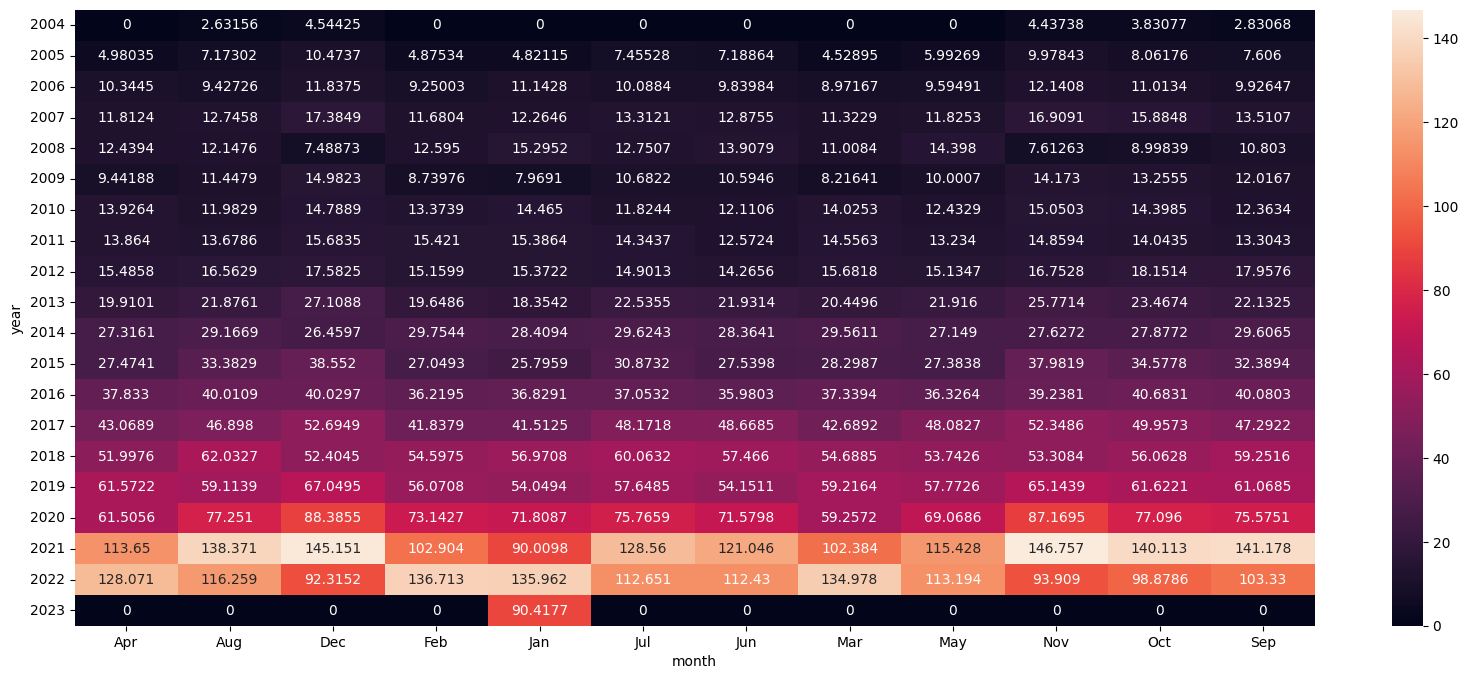

In [148]:
sns.heatmap(dataset_y_month,
            annot=True,
            fmt="g")     #fmt is format of the grid values

<AxesSubplot: xlabel='year', ylabel='Close'>

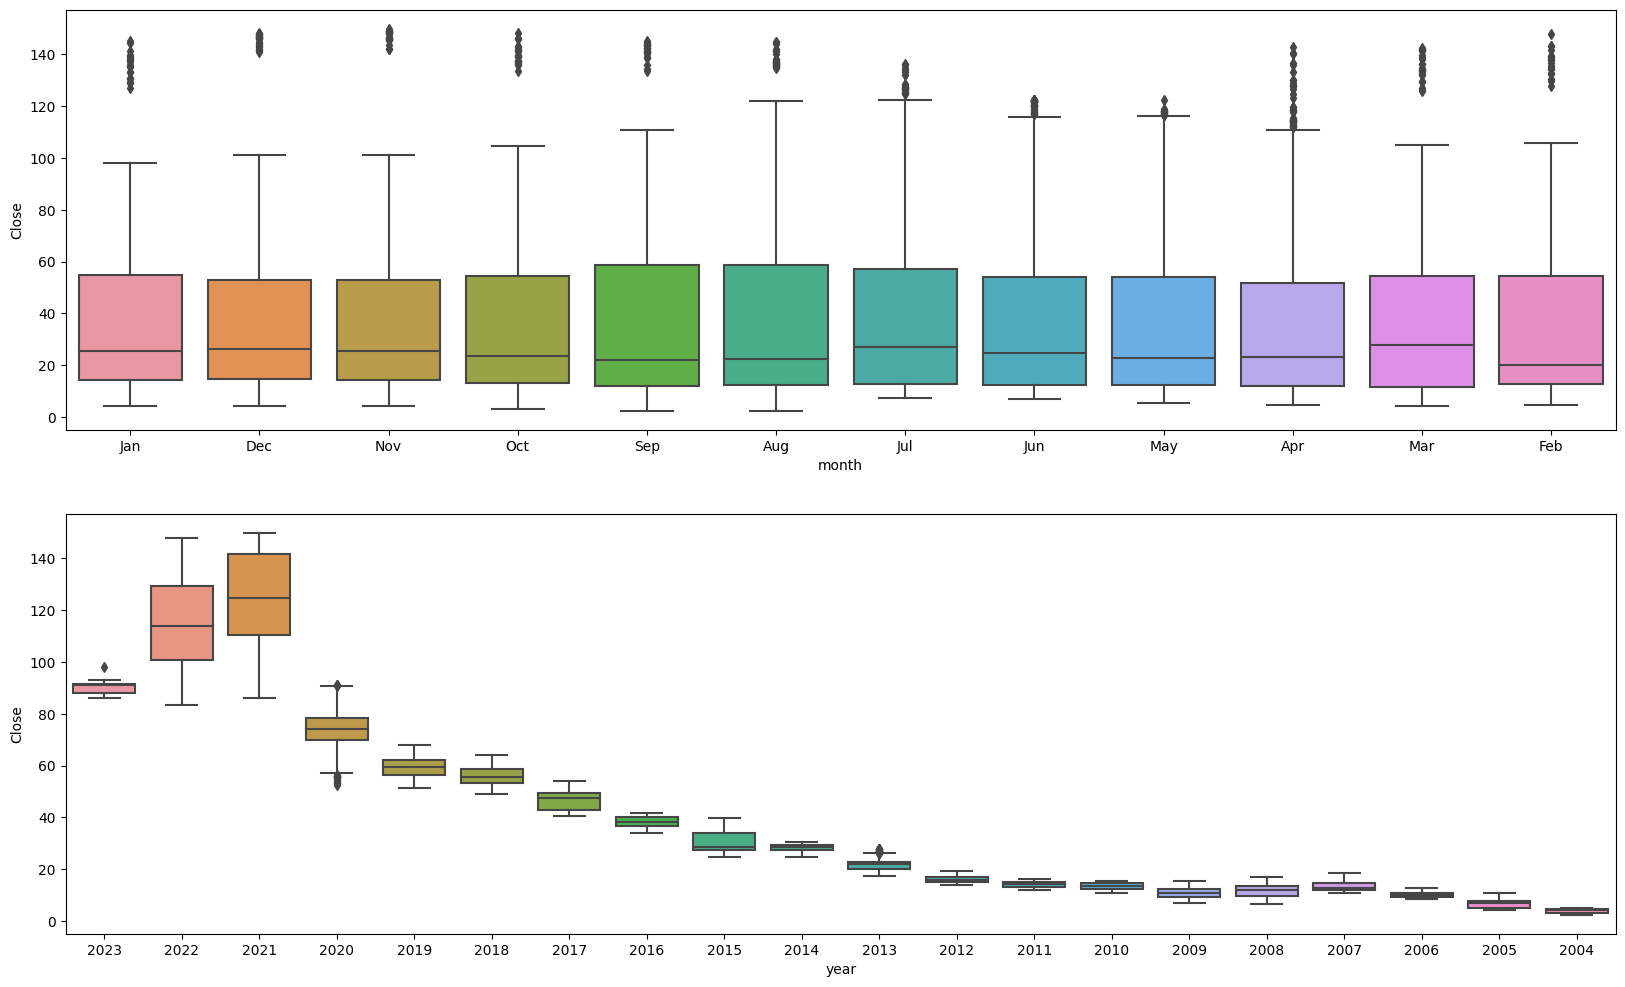

In [155]:
plt.figure(figsize=(20,12))
# boxplot for every month
plt.subplot(211)
sns.boxplot(x="month",y="Close",data=dataset)
# boxplot for every year
plt.subplot(212)
sns.boxplot(x="year",y="Close",data=dataset)

<AxesSubplot: xlabel='year', ylabel='Close'>

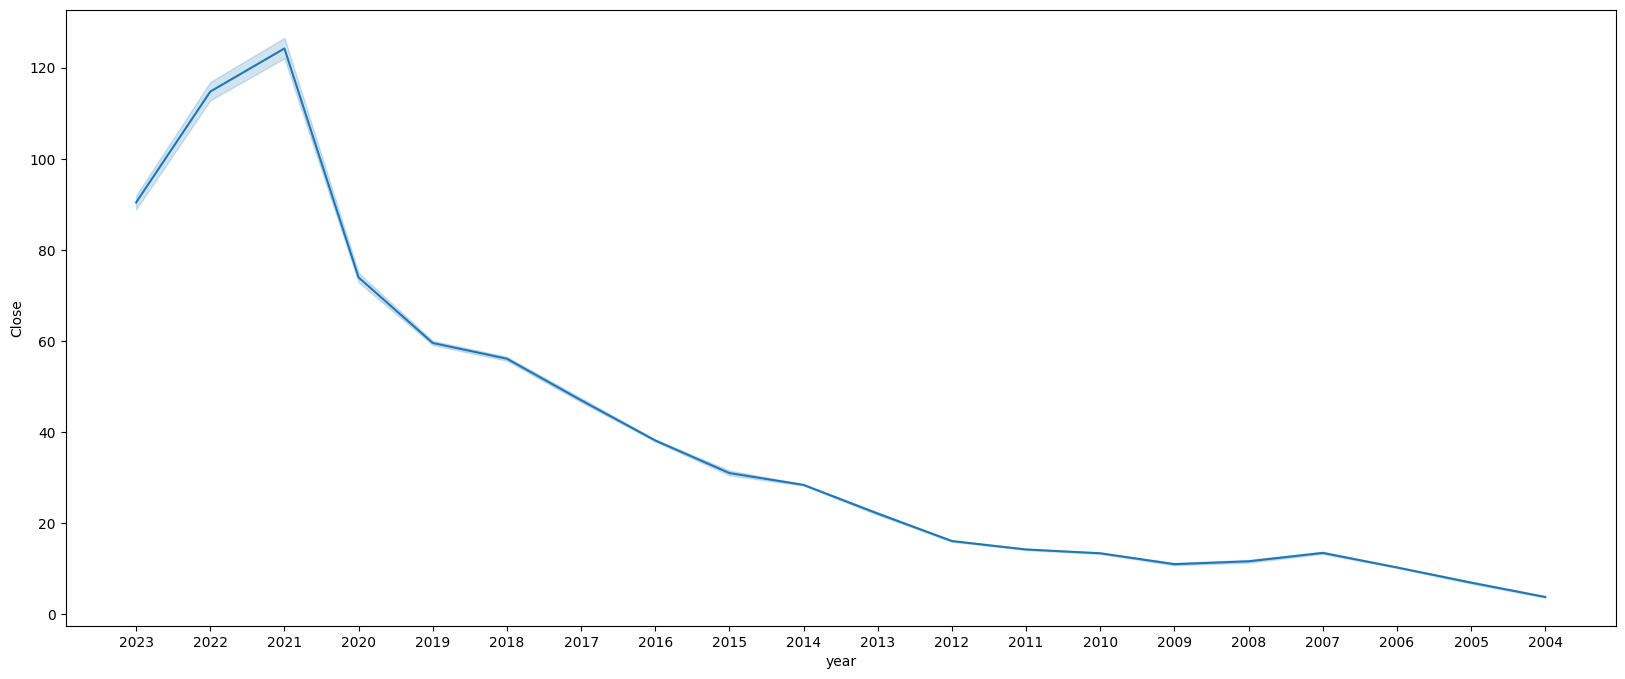

In [157]:
sns.lineplot(x="year",y="Close",data=dataset)